# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal of this project is to accurately predict the salary of a given job posting based on certain features such as job type, degree, major, industry, years of experience and miles from metropolis.
This is useful because it can help job searchers to determine whether a job listing offers a reasonable salary or not. Also, HR Department can make effective employment offers to potential hires.

In [71]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



__author__ = "Marilyne Kouassi"
__email__ = "marilynemkouassi@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe

#Training Dataframes
FeaturesTrain = pd.read_csv(r"/Users/marilynallade/Documents/data/train_features.csv")
SalaryTrain = pd.read_csv(r"/Users/marilynallade/Documents/data/train_salaries.csv")

#Testing Dataframes
FeaturesTest = pd.read_csv(r"/Users/marilynallade/Documents/data/test_features.csv")

In [3]:
#view the two training datasets 

FeaturesTrain.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
SalaryTrain.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
#Both the dataframes have the jobId column so we will merge them on jobId to create a new dataframe

Train_data = pd.merge(FeaturesTrain, SalaryTrain, on="jobId")
Train_data.head()
 

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [7]:
#Check the new dataframe

Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [8]:
Train_data.shape

(1000000, 9)

### ---- 3 Clean the data ----

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data , null data and remove it

Train_data.duplicated().sum()

0

There is no duplicate in this dataset

In [13]:
Train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [15]:
Train_data[Train_data['salary']<=0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


There are 5 data points where the salary was equal to 0. We will remove them because they won't help us to predict salaries.

In [16]:
# Remove columns with missing values 

Train_data = Train_data[Train_data['salary']>0]
Train_data.info

<bound method DataFrame.info of                    jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperie

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [18]:
#Identify Numerical and Categorical Variables

Train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
numerical_cols = ['yearsExperience', 'milesFromMetropolis']

categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [20]:
#Summarize numerical and categorical variables separately

Train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [21]:
Train_data.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684962453,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


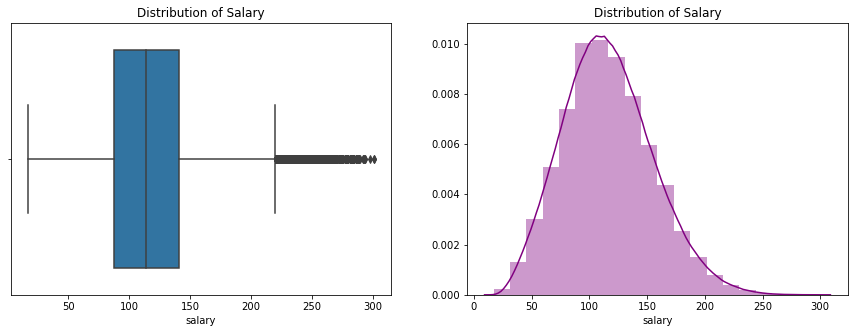

In [22]:
# Visualize target variable (salary)

plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.boxplot(x = Train_data['salary']) #boxplot
plt.title("Distribution of Salary")
plt.subplot(1,2,2)
sns.distplot(Train_data['salary'], bins =20, color= "Purple") #distplot
plt.title("Distribution of Salary")
# plt.savefig("Salary_Outliers.png")
plt.show()

In [23]:
# Use IQR rule to identify outliers

stat = Train_data.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
high_sal = stat['75%'] + 1.5 * IQR
low_sal = stat['25%'] - 1.5 * IQR
print("The high salary is {} and the lower salary is {}.".format(high_sal, low_sal))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The high salary is 220.5 and the lower salary is 8.5.


In [24]:
#check the salaries higher than the high salary
Train_data[Train_data['salary'] > high_sal]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [25]:
# Check most suspicious potential outliers above upper bound

Train_data.loc[Train_data['salary']> high_sal, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [26]:
Train_data.loc[Train_data['salary'] > high_sal, 'industry'].value_counts()

OIL          2368
FINANCE      2200
WEB          1280
HEALTH        631
AUTO          325
SERVICE       200
EDUCATION     113
Name: industry, dtype: int64

Conclusions

- CEO,CFO and CTO have higher salaries compared to other job types
- people who work in the oil, web, finance industries have higher salaries compared to the other industry

##### Visualizations between feature variables and target variable (salary)

In [30]:
def plot_variables(data, col):
    plt.figure(figsize = (15, 5))
    if data[col].dtype != 'int64':
        plt.subplot(1,2,1)
        # encode categorical values by salary mean
        mean = data.groupby(col)['salary'].mean()
        data[col] = data[col].astype('category')
        levels = mean.sort_values().index.tolist()
        data[col].cat.reorder_categories(levels, inplace = True)
        mean.sort_values().plot(kind = 'bar')
        
    if col not in ['companyId', 'yearsExperience', 'milesFromMetropolis']:
        plt.xticks(rotation = 45)
        plt.xlabel(col)
        plt.ylabel('Salary (Mean) by' + '' + col.capitalize())
        plt.subplot(1,2,2)
        
    if data[col].dtype == 'int64':
        # mean salary of each category
        mean = data.groupby(col)['salary'].mean()
        std = data.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), 
                         mean.values - std.values, 
                         mean.values + std.values,
                        alpha = 0.1)
        #plt.savefig("images/salary_each_category_" + col +".png")
    
    else: 
        sns.boxplot(x = col, y = 'salary', data=data)
        plt.xticks(rotation = 45)
        plt.ylabel('Salaries')
        #plt.savefig("images/salary_each_category" + col + ".png")
        plt.show()

In [31]:
cat_variables = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis', 'salary']
feat_variables = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis'] 

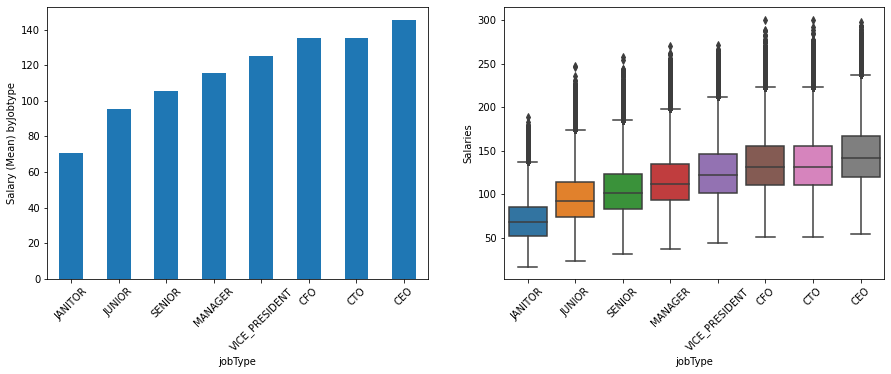

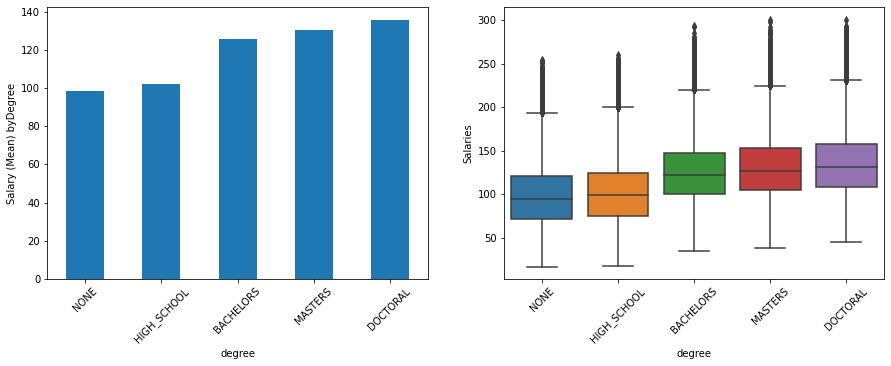

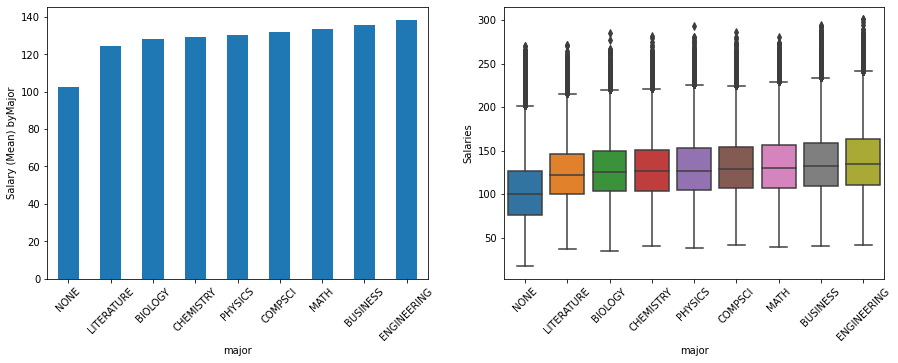

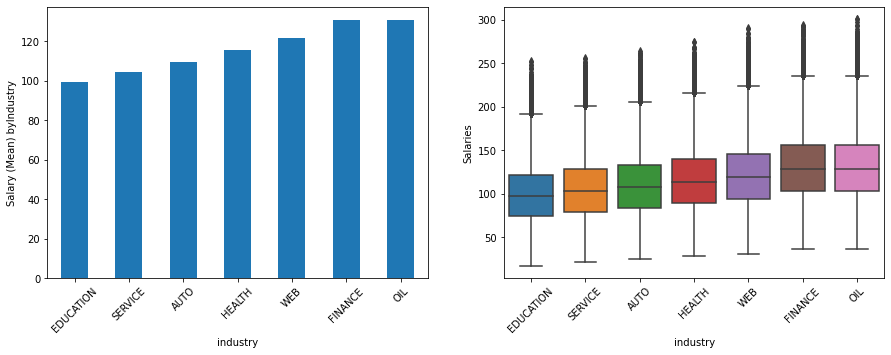

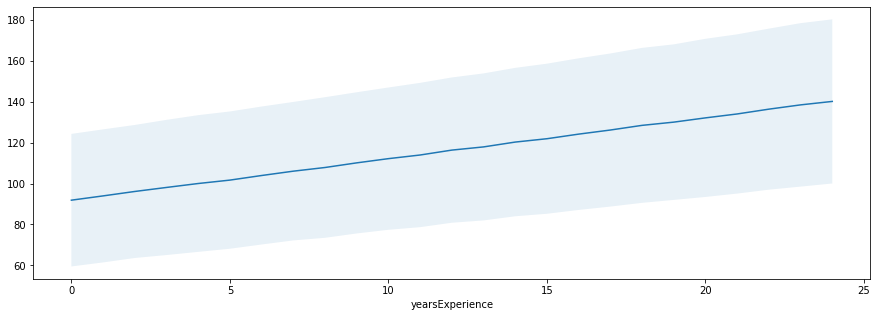

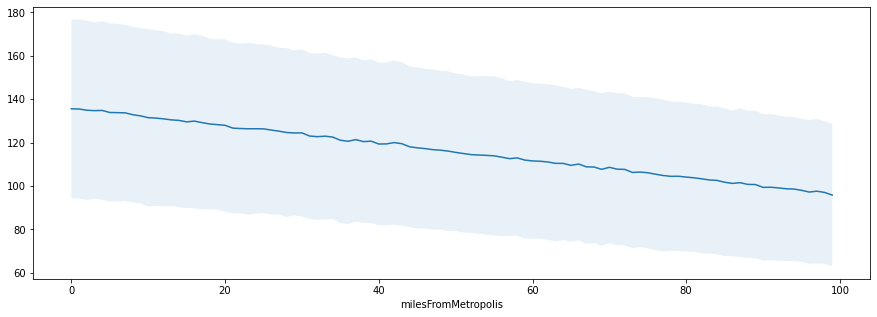

In [32]:
for feature in feat_variables:
    plot_variables(Train_data, feature)

Conclusions

- There is a relationship between salaries and job types as CEO,CFO,CTO have higher salaries compared to other job types
- There is a relationship between salaries and degree types as people with More advanced degrees have higher salaries
- People with majors of engineering, business and math have higher salaries
- people who work in the finance and oil industries have higher salaries 
- There is a positve relationship between salaries and number of years experience. The more experience you have, the higher the salary
- There is a negative relationship between salaries and number of miles from Metropolis. the further you live from Metropolis, the lower the salary you would recieve

#### Correlation matrix to see which features (including the target variable) are correlated with each other

In [33]:
#Label encoding for categorical variable to replace the value with mean salary fot that category

def encode_label(data, column):
    dict = {}
    cat_list = data[column].cat.categories.tolist()
    for cat in cat_list:
        dict[cat] = data[data[column] == cat]['salary'].mean()
    data[column] = data[column].map(dict)


In [34]:
Train_data_copy = Train_data.copy()
for column in Train_data_copy.columns:
    if Train_data_copy[column].dtype.name == 'category':
        encode_label(Train_data_copy, column)
        Train_data_copy[column] = Train_data_copy[column].astype('float')

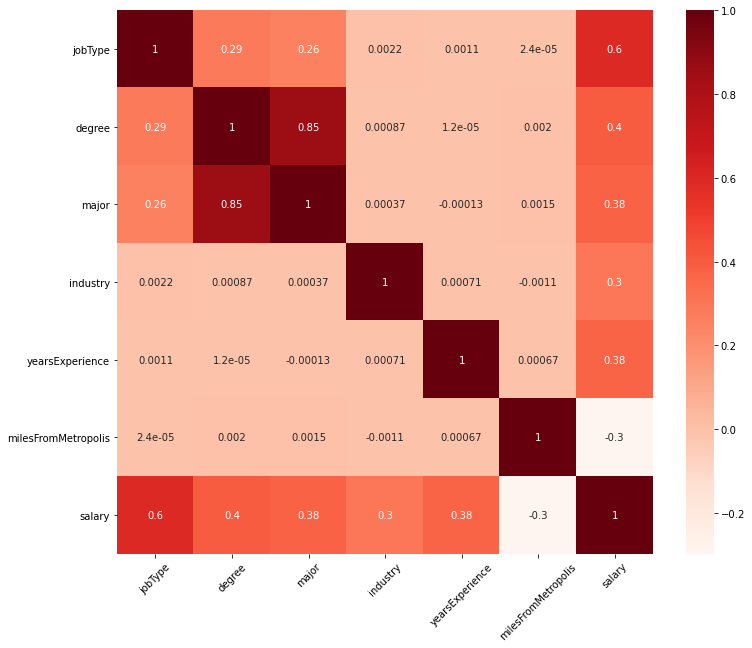

In [38]:
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(Train_data_copy[features + ['salary']].corr(), cmap='Reds', annot=True, linecolor='black')
plt.xticks(rotation=45)
#plt.savefig("images/correlation_matrix_heatmap.png")
plt.show();

Conclusions

- Job type has the strongest correlation with salary
- Major and degree are the most correlated. They have a positive correlation

### ---- 5 Establish a baseline ----

The baseline model I will use for this analysis is an average salary, with the most correlated feature to the salary target variable. In this case the most correlated feature is the job type.

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [39]:
MSE = mean_squared_error(Train_data_copy['jobType'],Train_data_copy['salary'])
MSE

963.9252996562975

### ---- 6 Hypothesize solution ----

### Models to improve results over the baseline model

#### Model 1 : Random Forest Regression

Random Forest handles overfitting, reduces variance and it is an independent classifers.


#### Model 2 : Linear Regression

Linear Regression is simple to implement and efficient to train.

#### Model 3 : Gradient Boosting Regression

Gradient Boost Regression has been selected for fast and high performance.

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

- 'jobType', 'degree', 'major', 'industry' are categorical features, one-hot encoding will be applied on these features

- 'jobId' and 'companyId' will not be considered in the model as they have not any impact on the model
 

In [40]:
#feature engineering

cat_variables = ['jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis', 'salary']
feat_variables = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis'] 

In [42]:
# One-hot encoding 

one_hot_var = pd.get_dummies(Train_data[cat_variables], drop_first=True)
train_dum = pd.concat([one_hot_var, Train_data[num_variables]], axis=1)
train_dum.head()


,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,...,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL,yearsExperience,milesFromMetropolis,salary
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,10,83,130
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,3,73,101
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,38,137
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,17,142
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,8,16,163


In [62]:
# split the data into train and test sets with test size at 20%
X_train, X_test, Y_train, Y_test = train_test_split(train_dum.iloc[:,:-1], train_dum.salary, test_size=0.2)

### ---- 8 Create models ----

In [15]:
#create and tune the models that I brainstormed during part 2

In [63]:
def base_models (model, X_train, X_test, Y_train, Y_test):
    """
    Function to fit and predict for each model
    
    Parameters:
    
    model, X_train, X_test, y_train, y_test
    
    Returns:
    
    MSE
    
    """
    
    
    model.fit(X_train, Y_train)
    
    predict_train = model.predict(X_train)
    mse_train = mean_squared_error(Y_train, predict_train)
    
    
    
    print("MSE: " + str(round(mse_train,2)))

#### Random Forest

In [65]:
forest = RandomForestRegressor(n_estimators=150, max_depth=30, max_features='auto', random_state=0, min_samples_split=60)
base_models(forest, X_train, X_test, Y_train, Y_test)

MSE: 325.14


#### linear Regression

In [66]:
lm = LinearRegression()
base_models(lm, X_train, X_test, Y_train, Y_test)

MSE: 384.53


#### Gradient Boosting Regressor 

In [67]:
grad = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls', verbose=0)
base_models(grad, X_train, X_test, Y_train, Y_test)

/Users/marilynallade/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


MSE: 354.64


### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

#### Random Forest with Cross validation

In [73]:
forest_nmse = cross_val_score(forest, X_test, Y_test,n_jobs=2,cv=5, scoring="neg_mean_squared_error")
forest_cv = -1.0 * np.mean(forest_nmse)
forest_cv

388.42689445494017

#### Linear Regression with cross validation

In [74]:
lm_nmse = cross_val_score(lm, X_test, Y_test,n_jobs=2, cv=5, scoring="neg_mean_squared_error")
lm_cv = -1.0 * np.mean(lm_nmse)
lm_cv

383.8085425323351

#### Gradient Boosting with Cross Validation

In [77]:
grad_nmse = cross_val_score(grad, X_test, Y_test, cv=5, n_jobs=2, scoring='neg_mean_squared_error' )
grad_cv = -1 * grad_nmse.mean()
grad_cv

361.350724649002

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as my "production" model

In [83]:
models_MSE =pd.DataFrame(({'Models':['Random Forest','Linear regression','Gradient Boosting Regressor'],
               'Mean Squared Error':[325.14, 384.53, 354.64], 'Mean_Squared_Error_CV':[388.43, 383.81, 361.35]}))
models_MSE

,Models,Mean Squared Error,Mean_Squared_Error_CV
0,Random Forest,325.14,388.43
1,Linear regression,384.53,383.81
2,Gradient Boosting Regressor,354.64,361.35


The best model is Random Forest because it has the low mean squared error compared to the other models

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [96]:
FeaturesTest = pd.read_csv(r"/Users/marilynallade/Documents/data/test_features.csv")
FeaturesTest.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [86]:
#Clean the data

FeaturesTest.isnull().sum()
FeaturesTest.duplicated().sum()


0

In [87]:
# check the data types 

FeaturesTest.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [103]:
cat_variables = ['jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis']

In [104]:
# One-hot encoding 
one_hot_var = pd.get_dummies(FeaturesTest[cat_variables], drop_first=True)
test_dum = pd.concat([one_hot_var, FeaturesTest[num_variables]], axis=1)
test_dum.head()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,22,73
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,20,47
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,17,9
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,14,96
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,10,44


In [105]:
test_prediction = forest.predict(test_dum) 
prediction = pd.DataFrame(test_prediction).rename(columns={0:'predicted_salary'})

/Users/marilynallade/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- degree_NONE
- industry_EDUCATION
- jobType_JANITOR
- major_NONE
Feature names seen at fit time, yet now missing:
- degree_BACHELORS
- industry_AUTO
- jobType_CEO
- major_BIOLOGY

  warnings.warn(message, FutureWarning)


In [107]:
# score the "test" dataset
final_prediction = pd.concat([FeaturesTest['jobId'], prediction], axis=1)
final_prediction.head(10)

,jobId,predicted_salary
0,JOB1362685407687,140.309183
1,JOB1362685407688,150.929636
2,JOB1362685407689,143.865026
3,JOB1362685407690,123.851254
4,JOB1362685407691,113.191479
5,JOB1362685407692,97.092109
6,JOB1362685407693,144.202727
7,JOB1362685407694,67.376096
8,JOB1362685407695,96.842577
9,JOB1362685407696,133.483168


### ---- 12 Deploy solution ----

In [16]:
#save prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [110]:
# save prediction to a csv file
final_prediction.to_csv("Salary_Predictions.csv", index=False)

In [116]:
feature_importance = pd.DataFrame({'features': test_dum.columns, 'importance': forest.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.head(10)

,features,importance
25,yearsExperience,0.189802
26,milesFromMetropolis,0.141102
6,jobType_VICE_PRESIDENT,0.106736
4,jobType_MANAGER,0.088002
5,jobType_SENIOR,0.079481
3,jobType_JUNIOR,0.070364
2,jobType_JANITOR,0.050028
23,industry_SERVICE,0.037053
24,industry_WEB,0.036629
1,jobType_CTO,0.036286


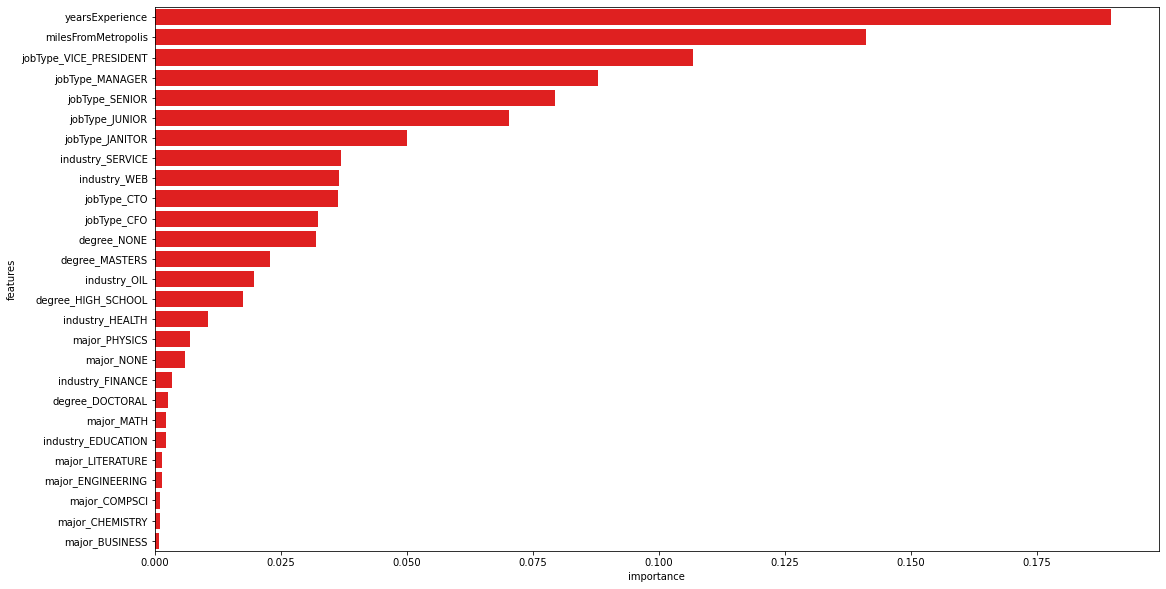

In [117]:
plt.figure(figsize=(18,10))
sns.barplot(x='importance', y='features',color='red', data=feature_importance)
plt.show();